## Group No

## Group Member Names:
1. 
2.
3.


# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What data do you need to answer the above problem?


--------------Type the answers below this line-------------- 

1. **Problem statement**: 

* Heart disease is considered as one of the major causes of death throughout the world. It cannot be easily predicted by the medical practitioners as it is a difficult task which demands expertise and higher knowledge for prediction.
* A heart attack occurs when an artery supplying your heart with blood and oxygen becomes blocked. A blood clot can form and block your arteries, causing a heart attack.
* The Heart Attack Analysis helps to understand the chance of attack occurrence (prediction of heart disease according to input attributes) in persons based on varied health conditions.
* In this assignment, the risk factors that causes heart disease is considered and predicted using classification algorithm. 
* The performance of these data mining techniques is measured by combining the results of predictive accuracy, ROC curve and AUC value using a standard data set as well as a collected data set.


#### Objective
* To predict whether a patient is at risk for a heart attack. This is a binary outcome. 
* Positive (+) = 1, patient is at risk 
* Negative (-) = 0, patient is not at risk

2. The dataset, heart.csv is taken from Kaggle. It has been uploaded to canvas.

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### About this dataset

* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic

* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack



# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly

## 2.2 Code for converting the above downloaded data into a dataframe


In [1]:
##---------Type the code below this line------------------##
import pandas as pd

dataset = pd.read_csv("heart.csv")

dataset.shape

(303, 14)

In [2]:
##---------Type the code below this line------------------##

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 2.3 Confirm the data has been correctly by displaying the first 5

In [3]:
##---------Type the code below this line------------------##
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 3. Data Preparation

## 3.1 Remove null data

In [4]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
# check for duplicates

duplicateRows = dataset[dataset.duplicated(keep = 'last')]
print('Duplicates', duplicateRows.shape)
print('Original dataset', dataset.shape)

Duplicates (1, 14)
Original dataset (303, 14)


In [6]:
# remove duplicates

dataset = dataset.drop_duplicates()
print('Modified dataset', dataset.shape)

Modified dataset (302, 14)


## 3.2 Encode categorical data

## 3.3 Feature Engg 

In [7]:
dataset = dataset.copy()

categorical_col =[cols for cols in dataset.columns if dataset[cols].nunique() < 10]
print("Categorical features of our dataset:\n",categorical_col)
print()

numeric_col =[cols for cols in dataset.columns if dataset[cols].nunique() > 10]
print("Numerical features of our dataset:\n",numeric_col)

Categorical features of our dataset:
 ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

Numerical features of our dataset:
 ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


In [8]:
cat_features = categorical_col
cat_df = dataset.loc[:, cat_features]
cat_df.head()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


In [9]:
num_features = numeric_col
num_df = dataset.loc[:, num_features]
num_df.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [10]:
from sklearn.preprocessing import MinMaxScaler

std_scaler1 = MinMaxScaler()
std_scaler2 = MinMaxScaler()
std_scaler3 = MinMaxScaler()
std_scaler4 = MinMaxScaler()
std_scaler5 = MinMaxScaler()

dataset['age'] = std_scaler1.fit_transform(dataset['age'].values.reshape(-1, 1))
dataset['trtbps'] = std_scaler2.fit_transform(dataset['trtbps'].values.reshape(-1, 1))
dataset['chol'] = std_scaler3.fit_transform(dataset['chol'].values.reshape(-1, 1))
dataset['thalachh'] = std_scaler4.fit_transform(dataset['thalachh'].values.reshape(-1, 1))
dataset['oldpeak'] = std_scaler5.fit_transform(dataset['oldpeak'].values.reshape(-1, 1))

In [11]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


## 3.4 Identify the target variables.


In [12]:
y = dataset.output
X = dataset.copy()

X.drop(['output'],axis=1,inplace=True)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2


In [13]:
print(X.shape)
print(y.shape)

(302, 13)
(302,)


## 3.5 Split the data into training set and testing set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(241, 13)
(241,)
(61, 13)
(61,)


# 4. Deep Neural Network Architecture

## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [16]:
from keras.models import Sequential
from keras import layers

2022-11-27 10:20:20.092764: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-27 10:20:20.092791: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [17]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-11-27 10:20:21.498643: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-27 10:20:21.498685: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-27 10:20:21.498715: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (seetha-HP-348-G4): /proc/driver/nvidia/version does not exist
2022-11-27 10:20:21.499041: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# 5. Training the model

## 5.1 Configure the training

Configure the model for training, by using appropriate optimizers and regularizations

In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


## 5.2 Train the model

In [20]:
classifier_nn = model.fit(X_train,y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=15)

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 1.3991 - accuracy: 0.5477 - val_loss: 1.2515 - val_accuracy: 0.5246
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 1.0619 - accuracy: 0.5477 - val_loss: 1.0118 - val_accuracy: 0.5246
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.8936 - accuracy: 0.5477 - val_loss: 0.8733 - val_accuracy: 0.5246
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7983 - accuracy: 0.5436 - val_loss: 0.7984 - val_accuracy: 0.5082
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7447 - accuracy: 0.5062 - val_loss: 0.7607 - val_accuracy: 0.4918
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7045 - accuracy: 0.4979 - val_loss: 0.7195 - val_accuracy: 0.4754
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.5228 - val_loss: 0.6855 - val_accuracy: 0.5410
Epoch 8/100


Epoch 59/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.8672 - val_loss: 0.4644 - val_accuracy: 0.8361
Epoch 60/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.8631 - val_loss: 0.4652 - val_accuracy: 0.8197
Epoch 61/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.8589 - val_loss: 0.4671 - val_accuracy: 0.8033
Epoch 62/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.8589 - val_loss: 0.4663 - val_accuracy: 0.8033
Epoch 63/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.8589 - val_loss: 0.4651 - val_accuracy: 0.8197
Epoch 64/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8631 - val_loss: 0.4587 - val_accuracy: 0.8361
Epoch 65/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.8631 - val_loss: 0.4607 - val_accuracy: 0.8197
Epoch 

# 6. Test the model

In [21]:
# Predict Labels
testLoss, testAccuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict Labels
Ypredicted = model.predict(X_test)

for i in range(len(Ypredicted)):
    if Ypredicted[i]>0.5:
        Ypredicted[i]=1
    elif Ypredicted[i]<=0.5:
        Ypredicted[i]=0

## 7.  Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

--------------Type the answers below this line--------------

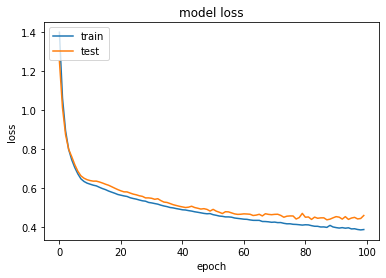

In [22]:
# summarize history for loss

import matplotlib.pyplot as plt

plt.plot(classifier_nn.history['loss'])
plt.plot(classifier_nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


num_classes = 2

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]


# confusion matrix
confusion_mtx = confusion_matrix(y_test, Ypredicted)
print('Confustion matrix = \n',confusion_mtx)

# Classification Report    
print('Classfication report = \n', classification_report(y_test, 
        Ypredicted, target_names=target_names))

Confustion matrix = 
 [[19 10]
 [ 3 29]]
Classfication report = 
               precision    recall  f1-score   support

     Class 0       0.86      0.66      0.75        29
     Class 1       0.74      0.91      0.82        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



# 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

